# Contexto:
---
1. Trabajaremos con la última versión de la BBDD relacional **<font color='red'>netflix_oscar.db</font>**. Esta BBDD no está completa ni tiene todas las variables. No es el objetivo detectar todos los errores, pero sí aprender a reconocerlos y tratarlos adecuadamente. 
1. La tabla **'content'** tiene información de los contenidos de netflix en general. 
1. La tabla **'production'** tiene información de los contenidos originales de netflix. 
1. La tabla **'oscar'** que esta relacionada con los premios a la industria del entretenimiento, especificamente el cine.

# 1.- Códigos de consultas con python

### 1.- Importar las librerías y métodos para conectar/desconectar la BBDD:

a) Desarrolar un código en python para la conexión/desconexión de la BBDD **<font color='red'>netflix_oscar.db</font>** .
Para ello:
    <b>i.</b> Debe crear un **primer método** para la conexión `get_connetion()` y que retorne la conexión (variable que llamaremos `conn`) y el cursor (variable que llamaremos `cur`).
    <b>ii.</b> Debe crear un **segundo método** para la desconexión `close_connetion()`. Debe cerrar ambas variables creadas anteriormente de forma adecuada.

In [4]:
import sqlite3 as sq3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display  # para mostrar display con el estilo DF de Jupiter Notebook

# CONEXION
def get_connection():
    conn = sq3.connect('/Data/netflix_oscar.db')
    cur = conn.cursor()
    return conn, cur

# DESCONEXION
def close_connection():
    cur.close()
    conn.close()

### 2.- Querys, python y DF de Pandas:
b) Desarrolar un código en python que obtenga los **no nulos, nulos, vacios y distintos** para las tablas **content, production y oscar** de la BBDD **<font color='red'>netflix_oscar.db</font>**

In [3]:
# 2.b

conn, cur = get_connection()
'''
Desarrollo una función que me permita contruir un dataframe
con los valores no nulos, nulos, vacíos y distintos de una tabla
'''
def tablas(tabla):
  df = pd.read_sql('SELECT * FROM ' + tabla, conn)
  lista = []
  for columna in df.columns:
    No_nulos = df[columna].count()
    Nulos = df[columna].isnull().sum()
    Distintos = len(df[columna].unique())
    Vacíos = len(df[df[columna]==''])

    tupla = (columna, No_nulos, Nulos, Distintos, Vacíos)
    lista.append(tupla)
  df = pd.DataFrame(lista)
  df.columns = ['Columna', 'No nulos', 'Nulos', 'Distintos', 'Vacíos']
  return df
  
# Aplico la función a cada tabla
print('Tabla content')
display(tablas('content'))
print()
print()
print('Tabla production')
display(tablas('production'))
print()
print()
print('Tabla oscar')
display(tablas('oscar'))

close_connection()

Tabla content


,Columna,No nulos,Nulos,Distintos,Vacíos
0,id_content,8745,0,8745,0
1,type,8745,0,2,0
2,title_content,8745,0,8745,0
3,director,6121,2624,4489,0
4,cast,7931,814,7644,0
5,country,7921,824,745,0
6,date_added,8735,10,1760,0
7,release_year,8745,0,74,0
8,rating,8738,7,15,0
9,duration,8745,0,220,0




Tabla production


,Columna,No nulos,Nulos,Distintos,Vacíos
0,id_production,551,0,551,0
1,id_content,551,0,551,0
2,title_production,551,0,551,0
3,genre,551,0,110,0
4,premiere,551,0,370,0
5,runtime,551,0,118,0
6,imdb_score,551,0,52,0
7,language,551,0,37,0
8,see_production,551,0,1,0




Tabla oscar


,Columna,No nulos,Nulos,Distintos,Vacíos
0,id_oscar,2758,0,2758,0
1,id_inf,2758,0,530,0
2,id_res,2758,0,2754,0
3,id_content,444,2314,79,0
4,title_oscar,2758,0,530,0
5,year_ceremony,2758,0,91,0
6,category,2758,0,93,0
7,name,2758,0,2164,0
8,winner,2758,0,2,0
9,directed_by,2753,5,392,0


c)  Desarrolar un código en python que permita realizar las siguientes consultas sobre las tabla de la BBDD **<font color='red'>netflix_oscar.db</font>**:
    <b>i.</b>  Listar todos los registros de la tabla, visualizando las columnas type, title_content, country, rating, duration, listed_in. 
    <b>ii.</b>  Generar un listado de todas las películas en las que participe Argentina, mostrando las columnas id_content, type, title_content, director, cast, rating, duration, listed_in.
    <b>iii.</b>  Presentar un listado con las columnas id_production, title_production, genre, language, imdb_score de los registros de la tabla en las que el imdb_score sea superior a 7.5.
    <b>iv.</b> Seleccionar los títulos con runtime superior a 90 y lenguaje Francés. Incluir el tipo de contenido. Ordenar los títulos de menor a mayor. 
    <b>v.</b>  Todas las filas de la tabla, presentando solo las columnas id_content, title_production, genre, runtime, imdb_Score.
    <b>vi.</b>  Mostrar las columnas id_content, type, title_content, listed_in de los registros en los que el rating sea público general o admitido para todas las edades. 
    <b>vii.</b>  Mostrar la cantidad  de películas en los idiomas portugués, francés, alemán, italiano y español, ordenados por cantidad, de mayor a menor.
    <b>viii.</b> Sume el Runtime de las películas que tengan como único país de origen United States, India, Japan, Spain y Mexico, discriminando y ordenando por país. Incluya la columna género.
    <b>ix.</b> Mostrar una lista de las películas originales de netflix ganadoras del oscar (si las hubiera) mostrando las columnas title, category, genre runtime, el imdb_score, la premiere y el año de la ceremonia.

In [7]:
'''
2.c.i
Listar todos los registros de la tabla, visualizando las columnas
type, title_content, country, rating, duration, listed_in.
'''
conn, cur = get_connection()

# Creo un df por cada tabla de la BBDD
content = pd.read_sql('SELECT * FROM content', conn)
production = pd.read_sql('SELECT * FROM production', conn)
oscar = pd.read_sql('SELECT * FROM oscar', conn)

# Creo un nuevo df con las columnas necesarias
df_i = content[['type', 'title_content', 'country', 'rating', 'duration', 'listed_in']]

print("Respuesta 2.c.i:")
display(df_i)

Respuesta 2.c.i:


,type,title_content,country,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,None,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,None,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8740,Movie,Zodiac,United States,R,158 min,"Cult Movies, Dramas, Thrillers"
8741,TV Show,Zombie Dumb,None,TV-Y7,2 Seasons,"Kids TV, Korean TV Shows, TV Comedies"
8742,Movie,Zombieland,United States,R,88 min,"Comedies, Horror Movies"
8743,Movie,Zoom,United States,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
'''
2.c.ii
Generar un listado de todas las películas en las que participe Argentina,
mostrando las columnas id_content, type, title_content, director, cast, rating, duration, listed_in
'''

df_ii =content[content['country'].str.contains('Argentina', na=False)]
df_ii = df_ii[['id_content', 'type', 'title_content', 'director', 'cast', 'rating', 'duration', 'listed_in']]
print("Respuesta 2.c.ii:")
display(df_ii)

Respuesta 2.c.ii:


,id_content,type,title_content,director,cast,rating,duration,listed_in
139,141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...",TV-MA,100 min,"Dramas, International Movies, Thrillers"
272,276,TV Show,The Kingdom,None,"Chino Darín, Nancy Dupláa, Joaquín Furriel, Pe...",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis..."
299,304,Movie,Esperando la carroza 2,Gabriel Condron,"Luis Brandoni, Betiana Blum, Roberto Carnaghi,...",TV-MA,88 min,"Comedies, Cult Movies, International Movies"
301,306,Movie,Tango Feroz,Marcelo Piñeyro,"Fernán Mirás, Cecilia Dopazo, Imanol Arias, Hé...",TV-MA,124 min,"Classic Movies, Dramas, International Movies"
430,435,TV Show,Okupas,None,"Rodrigo de la Serna, Diego Alonso, Ariel Stalt...",TV-MA,1 Season,"Classic & Cult TV, Crime TV Shows, Internation..."
...,...,...,...,...,...,...,...,...
7744,7801,TV Show,Psiconautas,None,"Guillermo Toledo, Gabriel Goity, Florencia Peñ...",TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh..."
8105,8164,Movie,Temporada de Caza,Natalia Garagiola,"Germán Palacios, Lautaro Bettoni, Boy Olmi, Ri...",TV-MA,108 min,"Dramas, International Movies"
8127,8186,Movie,The Aerial,Esteban Sapir,"Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...",TV-MA,99 min,"Dramas, International Movies, Sci-Fi & Fantasy"
8214,8274,Movie,The Desert Bride,"Cecilia Atán, Valeria Pivato","Paulina García, Claudio Rissi",TV-14,78 min,"Dramas, International Movies"


In [ ]:
'''
2.c.iii
Presentar un listado con las columnas id_production, title_production, genre, language,
imdb_score de los registros de la tabla en las que el imdb_score sea superior a 7.5.
'''
# Creo un nuevo df con los registros cuyo imdb score es mayor o igual a 7.5  
df_iii = production[production['imdb_score']>7.5]
# Selecciono las columnas necesarias
df_iii = df_iii[['id_production', 'title_production', 'genre', 'language', 'imdb_score']]
print("Respuesta 2.c.iii:")
display(df_iii)

Respuesta 2.c.iii:


,id_production,title_production,genre,language,imdb_score
33,34,Seaspiracy,Documentary,English,8.2
84,86,If Anything Happens I Love You,Animation / Short,English,7.8
88,90,Ludo,Anthology/Dark comedy,Hindi,7.6
105,107,The Trial of the Chicago 7,Drama,English,7.8
108,110,The Three Deaths of Marisela Escobedo,Documentary,Spanish,8.2
112,114,David Attenborough: A Life on Our Planet,Documentary,English,9.0
128,130,The Social Dilemma,Documentary,English,7.6
129,131,My Octopus Teacher,Documentary,English,8.1
160,163,Athlete A,Documentary,English,7.6
183,186,A Secret Love,Documentary,English,7.9


In [ ]:
'''
2.c.iv
Seleccionar los títulos con runtime superior a 90 y lenguaje Francés.
Incluir el tipo de contenido. Ordenar los títulos de menor a mayor.
'''
# Creo un nuevo df con los registros cuyo runtime es mayor a 90 y su idioma es French
df_iv = production[(production['runtime']>90) & (production['language']=='French')]
# Me quedo con las columnas necesarias
df_iv = df_iv[['title_production', 'language', 'genre', 'runtime']]
# Ordeno de manera ascendente por título
df_iv.sort_values(by = 'title_production', ascending=True, inplace=True)
print("Respuesta 2.c.iv:")
display(df_iv)

Respuesta 2.c.iv:


,title_production,language,genre,runtime
145,Anelka: Misunderstood,French,Documentary,94
536,Bigflo & Oil: Hip Hop Frenzy,French,Documentary,100
122,GIMS: On the Record,French,Documentary,96
519,I Am Not an Easy Man,French,Romantic comedy,98
164,Lost Bullet,French,Thriller,92
28,Madame Claude,French,Drama,112
11,Oxygen,French,Science fiction thriller,101
94,Rogue City,French,Crime drama,116
248,Street Flow,French,Drama,96
45,The Misadventures of Hedi and Cokeman,French,Comedy,99


In [ ]:
'''
2.c.v
Todas las filas de la tabla, presentando solo las columnas id_content,
title_production, genre, runtime, imdb_Score.
'''
df_v = production[['id_content', 'title_production', 'genre', 'runtime', 'imdb_score']]
print("Respuesta 2.c.v:")
display(df_v)

Respuesta 2.c.v:


,id_content,title_production,genre,runtime,imdb_score
0,1,Dick Johnson Is Dead,Documentary,90,7.5
1,1093,Dolly Parton: A MusiCares Tribute,Documentary,55,6.5
2,1071,Why Did You Kill Me?,Documentary,83,5.6
3,142,Extraction,Action,117,6.7
4,3988,Antoine Griezmann: The Making of a Legend,Documentary,60,6.5
...,...,...,...,...,...
546,4177,Fyre: The Greatest Party That Never Happened,Documentary,97,7.2
547,5041,Love per Square Foot,Romantic comedy,133,7.2
548,1873,The 40-Year-Old Version,Comedy,124,7.2
549,4708,Zion,Documentary,11,7.2


In [ ]:
'''
2.c.vi
Mostrar las columnas id_content, type, title_content, listed_in de los registros en 
los que el rating sea público general o admitido para todas las edades.
'''

# Elimino los valores nulos de la columna rating
df_vi = content
df_vi.dropna(subset=['rating'], inplace=True)
# df_vi['rating'].isnull().sum()


# Creo un nuevo df con los valores de rating necesarios (G, TV-Y, TV-G)
df_vi_a = df_vi[(df_vi['rating']=='G')
                  | (df_vi['rating']=='TV-Y')
                  | (df_vi['rating']=='TV-G')]

print("Respuesta 2.c.vi:")
# Muestro las columnas solicitadas
display(df_vi_a[['id_content', 'type', 'title_content', 'listed_in']])

Respuesta 2.c.vi:


,id_content,type,title_content,listed_in
23,24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,Children & Family Movies
65,66,TV Show,Numberblocks,Kids TV
66,67,TV Show,Raja Rasoi Aur Anya Kahaniyan,"Docuseries, International TV Shows"
71,72,Movie,A StoryBots Space Adventure,Children & Family Movies
74,76,Movie,You vs. Wild: Out Cold,Children & Family Movies
...,...,...,...,...
8683,8746,Movie,Willy Wonka & the Chocolate Factory,"Children & Family Movies, Classic Movies, Come..."
8685,8748,TV Show,Winsanity,Reality TV
8721,8784,TV Show,Yoko,Kids TV
8722,8785,Movie,Yoko and His Friends,Children & Family Movies


In [ ]:
'''
2.c.vii
 Mostrar la cantidad  de películas en los idiomas portugués, francés,
 alemán, italiano y español, ordenados por cantidad, de mayor a menor.
'''

# Creo un nuevo df filtrando por los idiomas solicitados
df_vii = production[(production['language']=='Portuguese')
                 | (production['language']=='French')
                 | (production['language']=='German')
                 | (production['language']=='Italian')
                 | (production['language']=='Spanish')]

print("Respuesta 2.c.vii:")
# Muestro la cantidad de peliculas de cada idioma ordenado de mayor a menor
display(df_vii['language'].value_counts(ascending=False))

Respuesta 2.c.vii:


Spanish       28
French        20
Italian       14
Portuguese    11
German         5
Name: language, dtype: int64

In [ ]:
'''
2.c.viii
 Sume el Runtime de las películas que tengan como único país de origen United States, 
 India, Japan, Spain y Mexico, discriminando y ordenando por país. Incluya la columna género.
'''

# Creo un nuevo df a partir de la tabla production y content porque necesito columnas de ambas tablas
df_viii = pd.merge(production, content, on='id_content', how='inner')

# Filtro las columnas que necesito utlizar
df_viii = df_viii[['country', 'runtime', 'genre']]

# Filtro por los países necesarios
df_viii = df_viii[(df_viii['country']=='United States')
                  | (df_viii['country']=='India')
                  | (df_viii['country']=='Japan')
                  | (df_viii['country']=='Spain')
                  | (df_viii['country']=='Mexico')]

print("Respuesta 2.c.viii:")
# Sumo el runtime de las peliculas de cada país incluyendo género
display((df_viii.groupby(['country','genre'])['runtime'].sum()).head(50))

Respuesta 2.c.viii:


country        genre                             
India          Action                                 147
               Anthology/Dark comedy                  149
               Comedy                                 448
               Comedy-drama                           356
               Crime drama                             97
               Documentary                            138
               Drama                                 1791
               Drama/Horror                           104
               Horror                                  94
               Horror anthology                       144
               Mystery                                 90
               Romantic comedy                        369
               Thriller                               602
Japan          Anime / Short                            4
               Anime/Fantasy                          104
               Anime/Science fiction                  106
               Drama  

In [ ]:
'''
2.c.ix
 Mostrar una lista de las películas originales de netflix ganadoras del oscar (si las hubiera)
 mostrando las columnas title, category, genre, runtime, el imdb_score, la premiere y el año de la ceremonia.
 '''

# Creo un nuevo df a partir de las tablas oscar y production con las columnas necesarias
columnas = ['title_oscar', 'category', 'genre', 'runtime', 'imdb_score', 'premiere', 'year_ceremony', 'winner']
df_ix = pd.merge(oscar, production, on='id_content', how='inner')[columnas]

# Filtro los títulos que ganaron algún oscar
df_ix = df_ix[df_ix['winner']==1]
print("Respuesta 2.c.ix:")
display(df_ix)

Respuesta 2.c.ix:


,title_oscar,category,genre,runtime,imdb_score,premiere,year_ceremony,winner
0,American Factory,DOCUMENTARY (Feature),Documentary,110,7.4,"August 21, 2019",2020,1
1,Icarus,DOCUMENTARY (Feature),Documentary,120,7.9,"August 4, 2017",2018,1
4,Mank,CINEMATOGRAPHY,Biopic,132,6.9,"December 4, 2020",2021,1
10,Mank,PRODUCTION DESIGN,Biopic,132,6.9,"December 4, 2020",2021,1
14,Marriage Story,ACTRESS IN A SUPPORTING ROLE,Drama,136,7.9,"December 6, 2019",2020,1
18,The White Helmets,DOCUMENTARY (Short Subject),Documentary,40,7.5,September 16. 2016,2017,1


### 3.- Python, DF de Pandas y Visualización:
d)  Desarrolar un código en python que permita realizar las siguientes instrucciones en la BBDD **<font color='red'>netflix_oscar.db</font>**. Utilice las estrategías de gráficación de matplotlib apropiadas para realizar cada una de las siguientes instrucciones:  

   <b>i.</b> Realizar un gráfico que muestre la relación entre la cantidad de series y películas disponibles en Netflix. 
   
   <b>ii.</b> Realizar un gráfico a partir de los países que tienen mayor cantidad total de títulos en la plataforma, desglosando por tipo de contenido, mostrando la información sólo para los primeros 10 países (mostrar el desglose por tipo de contenido), Obvie las cooperaciones entre países. 
    
   <b>iii.</b> Diseña una gráfica de barras apiladas que muestre la cantidad total de títulos estrenados por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. 

   <b>iv.</b> Diseña una gráfica de líneas que muestre la cantidad total de títulos estrenados por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. 

Respuesta 3.d.i:


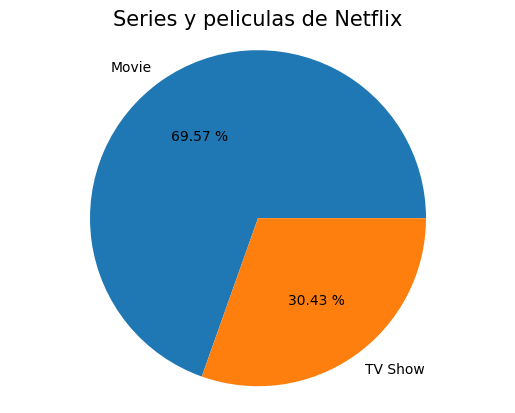

In [ ]:
'''
3.d.i
Realizar un gráfico que muestre la relación entre
la cantidad de series y películas disponibles en Netflix
'''

print("Respuesta 3.d.i:")
plt.pie(content['type'].value_counts(), labels=content['type'].value_counts().index, autopct="%0.2f %%")
plt.axis("equal")
plt.title('Series y peliculas de Netflix', fontsize=15)
plt.show()

Respuesta 3.d.ii:
Valores nulos: 
country    823
type         0
dtype: int64
Valores separados por coma: 
1308

Después de la limpieza: 
Valores nulos: 
country    0
type       0
dtype: int64
Valores separados por coma: 
0



<Figure size 1000x600 with 0 Axes>

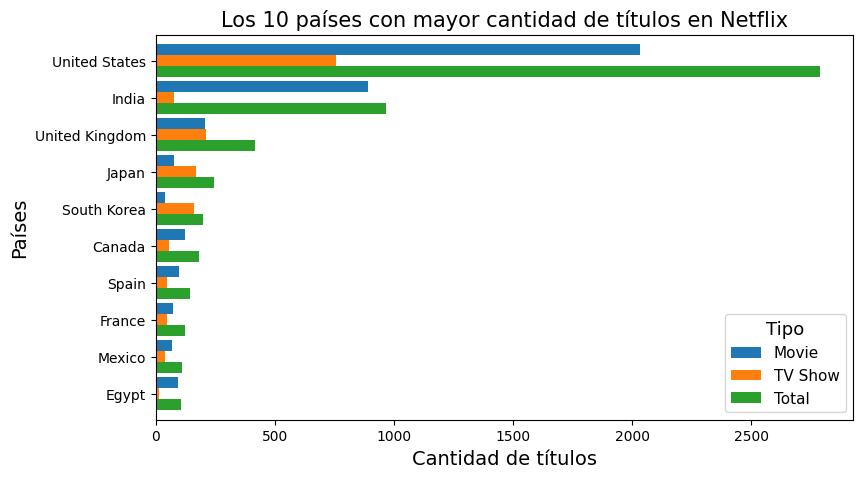

In [ ]:
'''
3.d.ii
Realizar un gráfico a partir de los países que tienen mayor cantidad total
de títulos en la plataforma, desglosando por tipo de contenido, mostrando
la información sólo para los primeros 10 países (mostrar el desglose por tipo de
contenido). Obvie las cooperaciones entre países.
'''

print("Respuesta 3.d.ii:")

# Busco nulos y valores separados por coma en country y type

print("Valores nulos: ")
print(content[['country','type']].isnull().sum())
print("Valores separados por coma: ")
print(content['country'].str.contains(',').sum())

# Separo las columnas country y type, elimino nulos y valores separadas por coma

cont_3ii = content[['country','type']].dropna()
cont_3ii = cont_3ii[~cont_3ii['country'].str.contains(',')]

print()
print("Después de la limpieza: ")
print("Valores nulos: ")
print(cont_3ii[['country','type']].isnull().sum())
print("Valores separados por coma: ")
print(cont_3ii['country'].str.contains(',').sum())
print()

# Aplico un groupby para separar las cantidades de contenido por país, incluyendo el total

cont_group = cont_3ii.groupby(['country','type'])['type'].count().unstack().fillna(0)
cont_group['Total'] = cont_group['Movie'] + cont_group['TV Show']

# Transformo a int64
cont_group = cont_group.astype('int64')

# Ordeno de mayor a menor por total de contenido
cont_group.sort_values(by='Total', ascending=False, inplace=True)
# Primeros 10
cont_group = cont_group.head(10)
# Grafico
plt.figure(figsize=(10, 6))
graf = cont_group.plot.barh(width=0.9, figsize=(9,5))
graf.invert_yaxis()
graf.set_title('Los 10 países con mayor cantidad de títulos en Netflix', fontsize=15)
graf.set_xlabel('Cantidad de títulos', fontsize=14)
graf.set_ylabel('Países', fontsize=14)
graf.legend(title='Tipo', title_fontsize='13', fontsize='11')

plt.show()

Respuesta 3.d.iii:


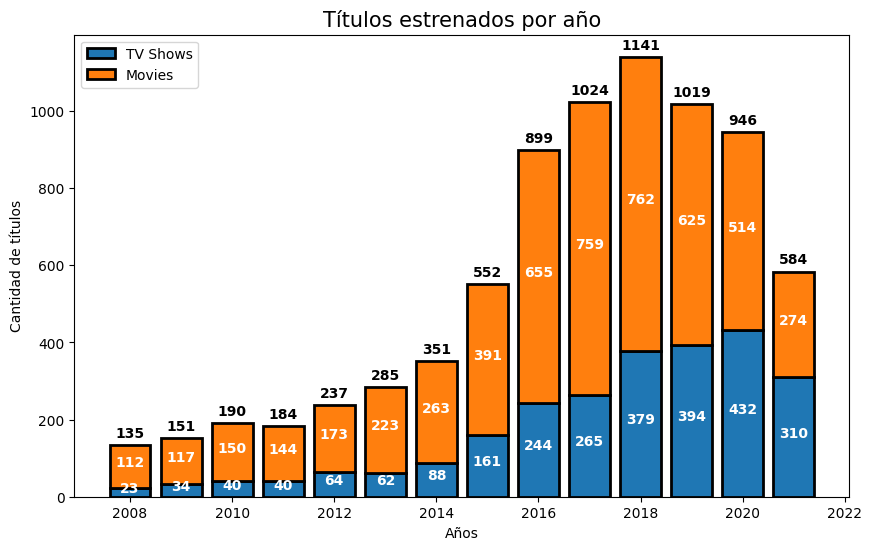

In [ ]:
'''
3.d.iii
Diseña una gráfica de barras apiladas que muestre la cantidad total de títulos estrenados
por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. 
'''
print("Respuesta 3.d.iii:")

# Creo un nuevo df con el contenido a partir del año 2008
df_iii = content[content['release_year']>=2008]

# Separo la cantidad de shows x año por un lado, y la cantidad de movies x año por otro lado
tv_show = df_iii[df_iii['type']=='TV Show']
tv_show = tv_show.groupby('release_year')['type'].value_counts().unstack()
movie = df_iii[df_iii['type']=='Movie']
movie = movie.groupby('release_year')['type'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Preparo los datos que usaré como ejes en el gráfico
x1 = tv_show.index.values
y1 = tv_show.values.flatten()
y2 = movie.values.flatten()

# Armo el gráfico de barras apiladas con los datos
ax.bar(x1, y1, label='TV Shows', edgecolor = "black", linewidth = 2)
ax.bar(x1, y2, bottom=y1, label='Movies', edgecolor = "black", linewidth = 2)

# Agrego etiquetas con los valores de tv shows y movies
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'White', weight = 'bold', size = 10)

# Agrego etiquetas con los valores totales 
total_values = np.add(y1, y2)
for i, total in zip(x1,total_values):
  ax.text(i, total +20, round(total),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title('Títulos estrenados por año', fontsize=15)
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de títulos')
plt.legend(loc = 'upper left')
plt.show()

Respuesta 3.e.iii:


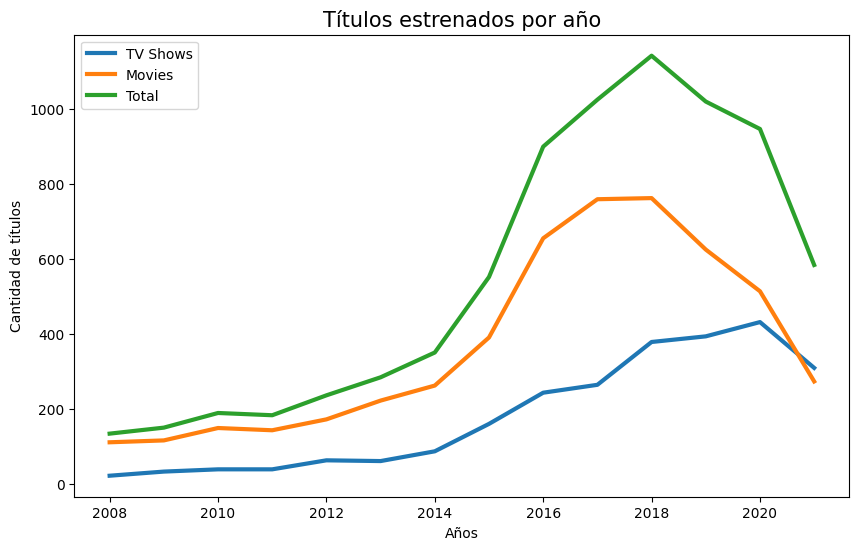

In [ ]:
'''
3.d.iv
Diseña una gráfica de líneas que muestre la cantidad total de títulos estrenados
por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. 
'''
# Reutilizo las variables usadas en el gráfico anterior ya que tengo que utilizar los mismos datos

print("Respuesta 3.e.iii:")

fig, ax = plt.subplots(figsize=(10, 6))

# Armo el gráfico de barras apiladas con los datos
ax.plot(x1, y1, label='TV Shows', linewidth = 3)
ax.plot(x1, y2, label='Movies', linewidth = 3)
ax.plot(x1, total_values, label='Total', linewidth = 3)

ax.set_title('Títulos estrenados por año', fontsize=15)
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de títulos')
plt.legend(loc = 'upper left')
plt.show()

e)  Desarrolar un código en python que permita realizar las siguientes instrucciones en la BBDD **<font color='red'>netflix_oscar.db</font>** . Use las estrategías de gráficación en seaborn que sean convenientes para realizar cada una de las siguientes instrucciones:  

   <b>i.</b> Construir un gráfico que muestre de forma descendente el top 20 de directores con más producciones. 

   <b>ii.</b> Construir un gráfico que muestre de forma descendente los 20 géneros de Netflix con mayor cantidad de producciones.  

   <b>iii.</b> Construir un gráfico que muestre de forma descendente todas las clasificaciones por público (rating) desglosando por tipo de contenido. 

   <b>iv.</b> Construir un gráfico que muestre de forma descendente los 15 idiomas de películas con mayor cantidad de títulos, sin contar inglés.

Respuesta 3.e.i:

Valores nulos en columna 'director':  2621 
Valores nulos en columna 'title_content':  0



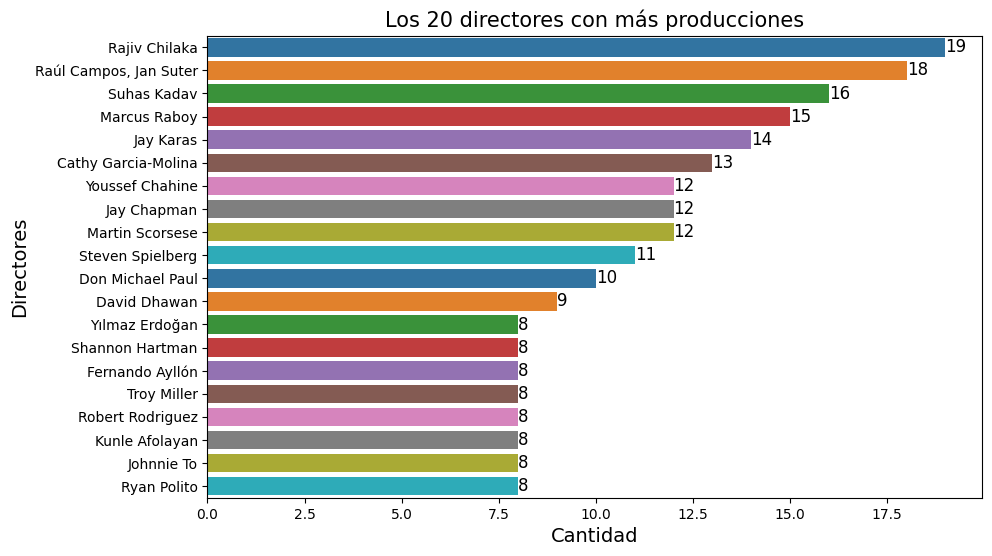

In [ ]:
'''3.e.i
Construir un gráfico que muestre de forma descendente el top 20 de directores con más producciones.
'''

print("Respuesta 3.e.i:")
print()
# Buscamos y eliminamos valores nulos
print("Valores nulos en columna 'director': ",
       content['director'].isnull().sum(), 
       "\nValores nulos en columna 'title_content': ", 
       content['title_content'].isnull().sum())

print()
df_dir = content[['director','title_content']].dropna()

# Agrupamos por cantidad de contenido
df_dir_group = df_dir.groupby(['director']).count()

# Ordeno de mayor a menor por cantidad de contenido
df_dir_group.sort_values(by='title_content', ascending=False, inplace=True)

# Primeros 20
df_dir_group = df_dir_group.head(20)

# Grafico
plt.figure(figsize=(10, 6))
graf = sns.barplot(y=df_dir_group.index, 
                   x=df_dir_group['title_content'], 
                   data=df_dir_group, 
                   palette = "tab10")

# Agrego etiquetas con los valores 
for index, value in enumerate(df_dir_group['title_content']):
    graf.text(value, index, str(value), ha="left", va="center", fontsize=12)

graf.set_title('Los 20 directores con más producciones', fontsize=15)
graf.set_xlabel('Cantidad', fontsize=14)
graf.set_ylabel('Directores', fontsize=14)

plt.show()

Respuesta 3.e.ii:


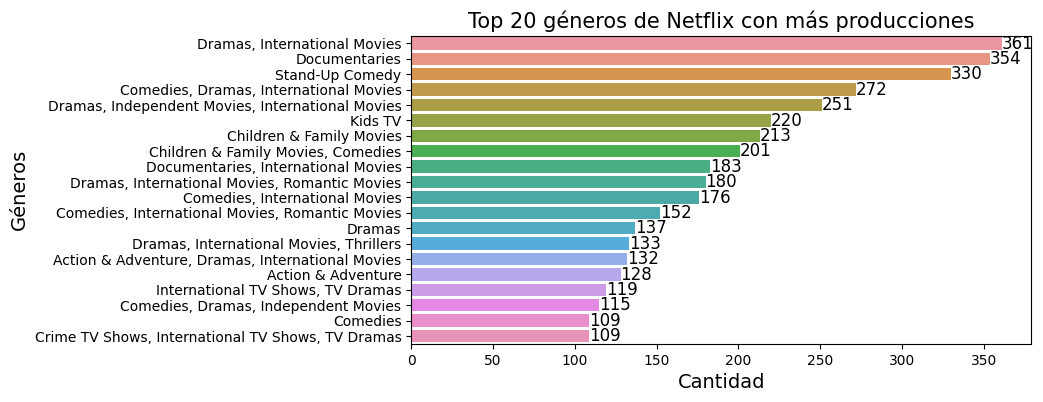

In [ ]:
'''
3.e.ii
Construir un gráfico que muestre de forma descendente los 20 géneros
de Netflix con mayor cantidad de producciones.
'''

print("Respuesta 3.e.ii:")
cont_gen = content['listed_in'].value_counts().head(20)
cont_gen.values

# Grafico
plt.figure(figsize=(8, 4))
graf = sns.barplot(x=cont_gen, y=cont_gen.index)

# Agrego etiquetas con los valores 
for index, value in enumerate(cont_gen):
    graf.text(value, index, str(value), ha="left", va="center", fontsize=12)

plt.title("Top 20 géneros de Netflix con más producciones", fontsize=15)
graf.set_xlabel('Cantidad', fontsize=14)
graf.set_ylabel('Géneros', fontsize=14)

plt.show()

Respuesta 3.e.iii:


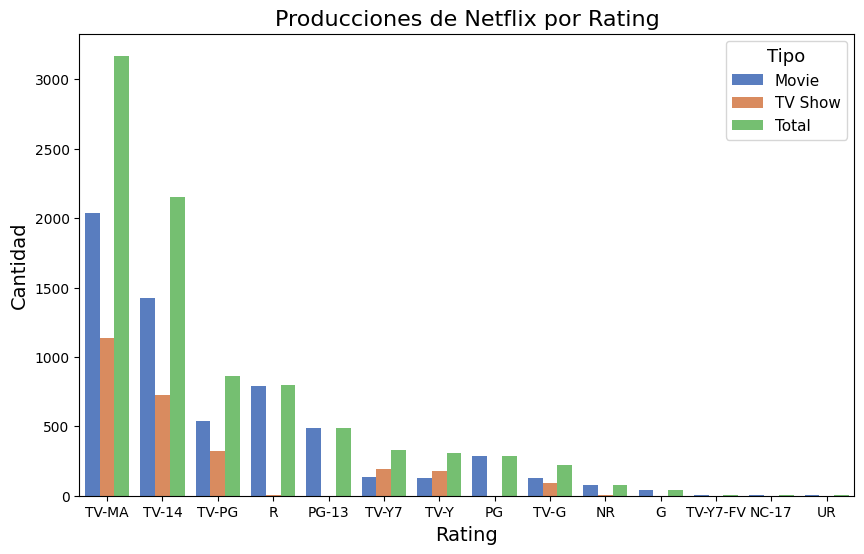

In [14]:
'''
3.e.iii
Construir un gráfico que muestre de forma descendente todas las
clasificaciones por público (rating) desglosando por tipo de contenido.
'''

print("Respuesta 3.e.iii:")
cont_rating = content[['rating','type']].dropna()
cont_rating = cont_rating.groupby(['rating','type'])['type'].count().unstack().fillna(0)
cont_rating['Total'] = cont_rating['Movie'] + cont_rating['TV Show']
cont_rating.sort_values(by='Total', ascending=False, inplace=True)
cont_rating = cont_rating[['Movie','TV Show','Total']].astype('int64')
cont_rating.reset_index(inplace=True)
cont_rating2 = cont_rating.melt(id_vars='rating', var_name='Type', value_name='Count')

# Grafico
plt.figure(figsize=(10, 6))
graf = sns.barplot(x='rating', y='Count', hue='Type', data=cont_rating2, palette='muted') 

graf.set_title('Producciones de Netflix por Rating', fontsize=16)
graf.set_xlabel('Rating', fontsize=14)
graf.set_ylabel('Cantidad', fontsize=14)
graf.legend(title='Tipo', title_fontsize='13', fontsize='11')

plt.show()

Respuesta 3.e.iv:


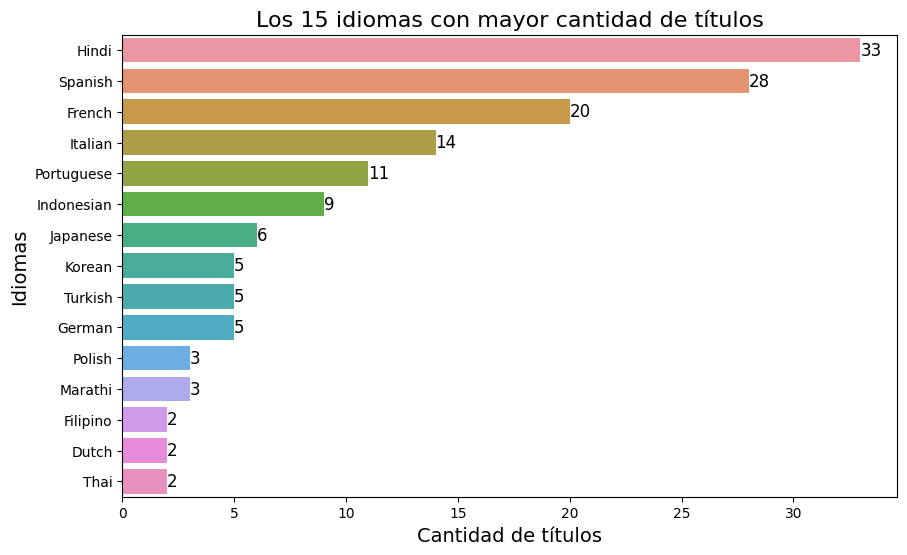

In [16]:
'''
3.e.iv
Construir un gráfico que muestre de forma descendente los 15 idiomas
de películas con mayor cantidad de títulos, sin contar inglés.
'''

print("Respuesta 3.e.iv:")
prod_idiomas = production[~production['language'].str.contains('English')]
prod_idiomas = prod_idiomas['language'].value_counts()
prod_idiomas = pd.DataFrame(prod_idiomas)
prod_idiomas.reset_index(inplace=True)
prod_idiomas = prod_idiomas.head(15)
# Gráfico
plt.figure(figsize=(10, 6))
graf = sns.barplot(data=prod_idiomas.head(15), x=prod_idiomas['language'], y=prod_idiomas['index'])

# Agrego etiquetas con los valores 
for index, value in enumerate(prod_idiomas['language']):
    graf.text(value, index, str(value), ha="left", va="center", fontsize=12)

graf.set_title('Los 15 idiomas con mayor cantidad de títulos', fontsize=16)
graf.set_xlabel('Cantidad de títulos', fontsize=14)
graf.set_ylabel('Idiomas', fontsize=14)

plt.show()